In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in WardIcome.csv & _311requests.csv

wardincome = pd.read_csv("WardIncome.csv")
requests = pd.read_csv("_311requests.csv")

In [3]:
# Subset the  _311requests data to create a data set of just "Parking Enforcement" related service requests 
#(based on the SERVICECODEDESCRIPTION column

parksub = requests[requests['SERVICECODEDESCRIPTION'] == 'Parking Enforcement']
parksub.head()

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
9,-77.014499,38.900429,1804423,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 07:12:30+00,2014/01/02 11:58:09+00,...,398742.48,136952.11,38.900421,-77.014497,WASHINGTON,DC,20001.0,305616.0,Ward 6,mr. lester...please ticket and tow
10,-77.066282,38.910015,1804424,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 07:39:46+00,2014/01/02 10:59:48+00,...,394251.48,138018.30,38.910008,-77.066279,WASHINGTON,DC,20007.0,272751.0,Ward 2,please ticket and tow.....helen
17,-77.006891,38.833219,1804431,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 07:12:35+00,2014/01/02 11:17:23+00,...,399401.87,129491.23,38.833211,-77.006889,WASHINGTON,DC,20032.0,29779.0,Ward 8,NaN
19,-77.035739,38.934271,1804433,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 07:34:13+00,2014/01/02 08:44:07+00,...,396901.55,140709.38,38.934263,-77.035737,WASHINGTON,DC,20010.0,226206.0,Ward 1,NaN
20,-76.991520,38.903684,1804434,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 07:45:02+00,2014/01/02 10:15:46+00,...,400735.75,137313.44,38.903677,-76.991518,WASHINGTON,DC,20002.0,285821.0,Ward 5,"emnp verifying 8 signs 8-2:00pm on Jan 4, 2014"


In [4]:
#Using the subsetted 311 requests dataset, aggregate the data to get the number of these requests by Ward
parkagg = parksub[['WARD', 'SERVICECODEDESCRIPTION']].groupby('WARD').agg('count')
parkagg = parkagg.reset_index()
parkagg.columns = ['Ward', 'ParkingRequests']
parkagg

,Ward,ParkingRequests
0,Ward 1,4282
1,Ward 2,5572
2,Ward 3,2139
3,Ward 4,2048
4,Ward 5,3599
5,Ward 6,6318
6,Ward 7,1405
7,Ward 8,1351


In [5]:
#Merge the ward income data set and the aggregated, subsetted 311 request data set (inner join) to create one dataset with the median income, mean income, 
#and number of parking enforcement requests for each ward

merged_df = pd.merge(wardincome, parkagg, on='Ward', how='inner' )
merged_df

,Ward,MedianHHincome,MeanHHincome,ParkingRequests
0,Ward 1,82159,106388,4282
1,Ward 2,100388,140459,5572
2,Ward 3,112873,176921,2139
3,Ward 4,74600,111933,2048
4,Ward 5,57554,77329,3599
5,Ward 6,94343,117002,6318
6,Ward 7,39165,53093,1405
7,Ward 8,30910,44245,1351


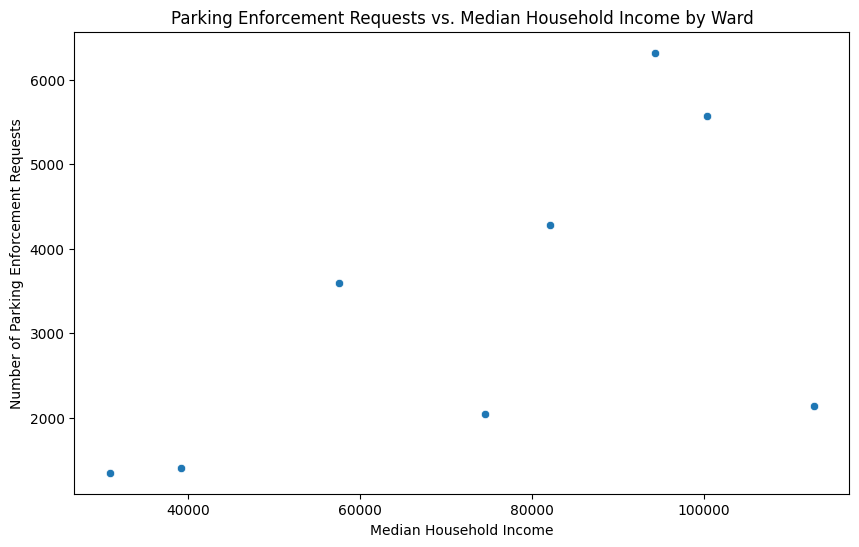

In [6]:
# Graph of Median Household Income and Number of Parking Enforcement Requets
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='MedianHHincome', y='ParkingRequests')
plt.title('Parking Enforcement Requests vs. Median Household Income by Ward')
plt.xlabel('Median Household Income')
plt.ylabel('Number of Parking Enforcement Requests')
plt.show()

This visualization shows that wards with the lowest median household incomes have fewer parking enforcement requests. As median income increases, the number of requests also increases, peaking around wards wih median incomes about $100,000. Beyond this point, as median income continues to rise, the number of requests decreases again.
This suggests a non-linear between median income and the number of parking enforcement requests. Wards with moderate-to-high median incomes appear to experience more parking enforcement requests than either the lowest or highest-income wards. This pattern may imply that middle-income wards face more parking constraints or have denser populations, leading to higher demand for enforcement.

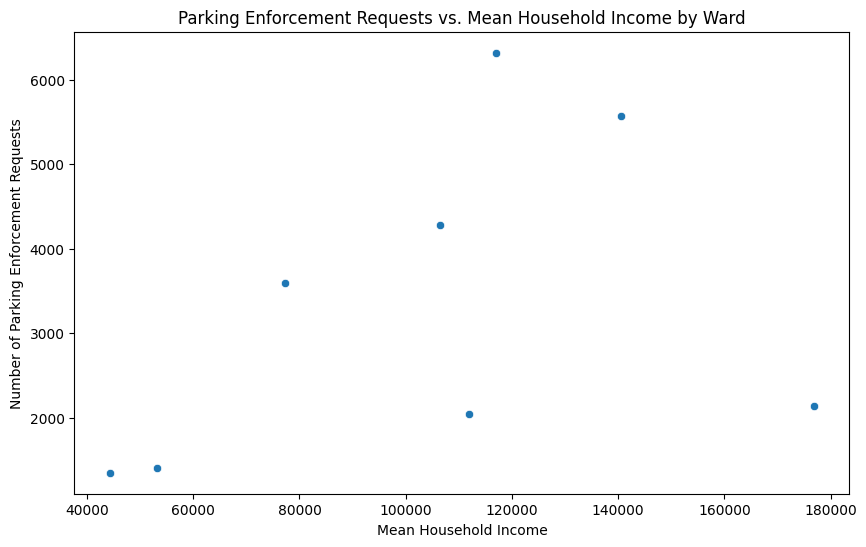

In [7]:
#Mean Household Income and Number of Parking Enforcement Requests.
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='MeanHHincome', y='ParkingRequests')
plt.title('Parking Enforcement Requests vs. Mean Household Income by Ward')
plt.xlabel('Mean Household Income')
plt.ylabel('Number of Parking Enforcement Requests')
plt.show()

This visualization indidcates that there is a non-linear association between mean household income and the number of parking enforcement requests. Wards with lower mean household incomes tend to have fewer parking enforcement requests.As mean household income rises, we see an increase in the number of requests, peaking around wards with mean incomes in the range of \\$100,000 to \\$140,000. However, at the highest incomes levels (above $140,000), there is a noticeable decline in parking enforcement requests.
This pattern may suggest that parking enforcement is more commonly requested or necessary in moderately affluent areas, where parking demand and restrictions may be higher. In lower-income wards, the demand or regulation for parking enforcement might be lower. Meanwhile, in the highest-income wards, residents may have more private parking resources, reducing the need for public parking enforcement.